In [2]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv('Student_Performance.csv')

In [4]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [7]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [10]:
print("Unique values in 'Extracurricular Activities' before encoding:", df['Extracurricular Activities'].unique())

Unique values in 'Extracurricular Activities' before encoding: ['Yes' 'No']


In [11]:
le = LabelEncoder()
df['Extracurricular Activities'] = df['Extracurricular Activities'].astype(str)
le.fit(df['Extracurricular Activities'])
df['Extracurricular Activities'] = le.transform(df['Extracurricular Activities'])

In [12]:
print("Encoded values for 'Extracurricular Activities':", df['Extracurricular Activities'].unique())
print("LabelEncoder classes:", le.classes_)

Encoded values for 'Extracurricular Activities': [1 0]
LabelEncoder classes: ['No' 'Yes']


In [13]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=3)  # Limit depth for visualization
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [16]:
y_pred = dt_model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 39.54
R^2 Score: 0.89


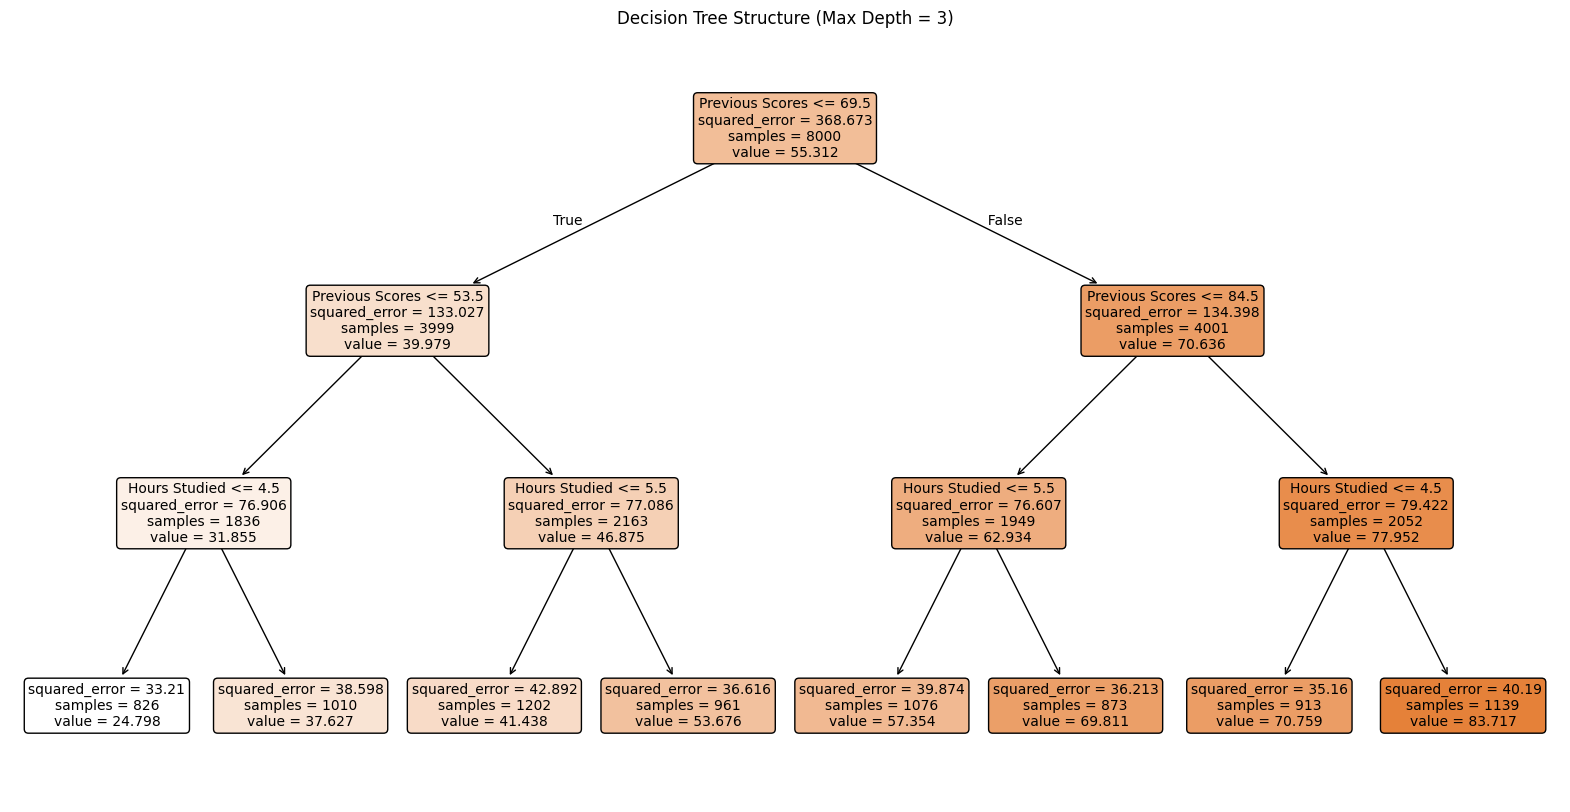

Decision tree visualization


In [18]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure (Max Depth = 3)")
plt.show()
plt.close()
print("Decision tree visualization")

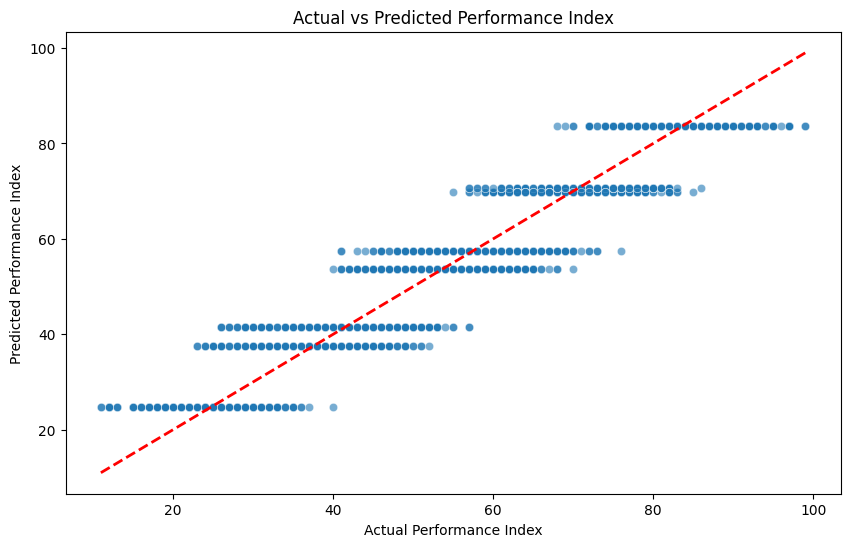

Actual vs Predicted scatter plot


In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance Index")
plt.show()
plt.close()
print("Actual vs Predicted scatter plot")

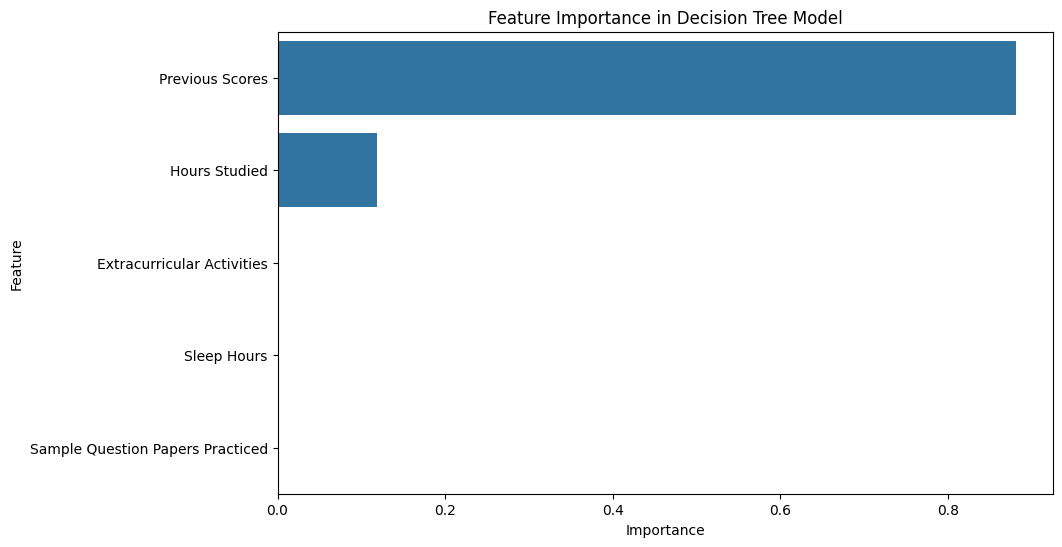

Feature importance plot


In [20]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance in Decision Tree Model")
plt.show()
plt.close()
print("Feature importance plot")

In [21]:
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [22]:
try:
    loaded_model = joblib.load('decision_tree_model.pkl')
    loaded_le = joblib.load('label_encoder.pkl')

    print("Loaded LabelEncoder classes:", loaded_le.classes_)

    new_data = pd.DataFrame({
        'Hours Studied': [7],
        'Previous Scores': [85],
        'Extracurricular Activities': [loaded_le.transform(['Yes'])[0]],
        'Sleep Hours': [6],
        'Sample Question Papers Practiced': [5]
    })

    prediction = loaded_model.predict(new_data)
    print(f"Predicted Performance Index: {prediction[0]:.2f}")

except ValueError as e:
    print(f"Error during prediction: {e}")
    print("Ensure that 'Extracurricular Activities' values match those used during training (e.g., 'Yes' or 'No').")
    print("LabelEncoder classes:", loaded_le.classes_)
except FileNotFoundError:
    print("Model or LabelEncoder file not found. Please ensure 'decision_tree_model.pkl' and 'label_encoder.pkl' exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Loaded LabelEncoder classes: ['No' 'Yes']
Predicted Performance Index: 83.72
